# Run the whole deltas algorithm

In [25]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

MIMIC-III-sepsis: 4165
Number of attribues: 26
Classes total: 3301 - 864

Classes train: 1650 - 432
Classes test:  1651 - 432


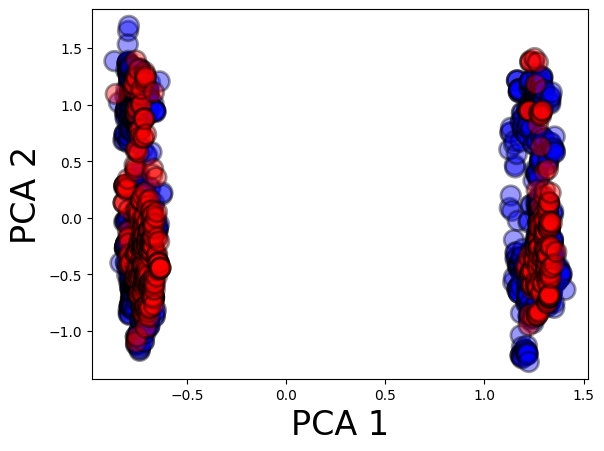

int64


In [26]:
dataset = 'MIMIC-III-sepsis' # change ind to select dataset to use
model = 'SVM-rbf'
# model = 'MLP-small'
model = 'MLP'
# model = 'MLP-deep'
model = 'MIMIC'

# dataset = datasets[7]  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=True)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])
print(data_clf['data']['y'].dtype)

In [27]:
data_clf['data']['X'].shape

(2082, 26)

## Get Classifier

Baseline


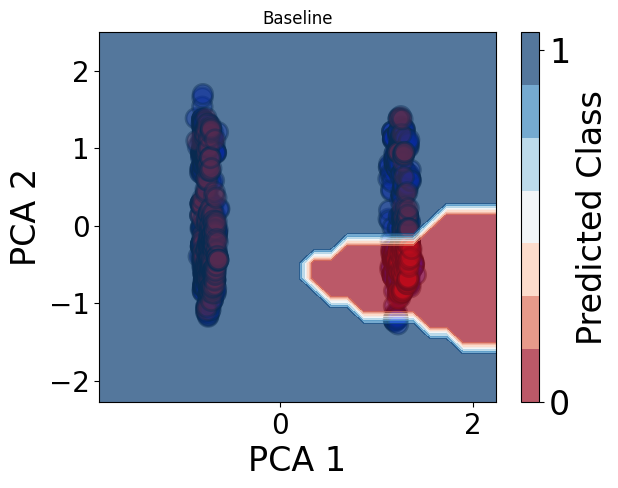

SMOTE


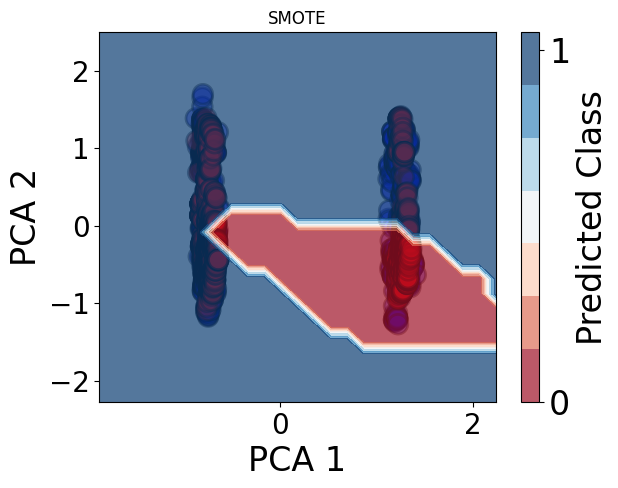

Balanced Weights


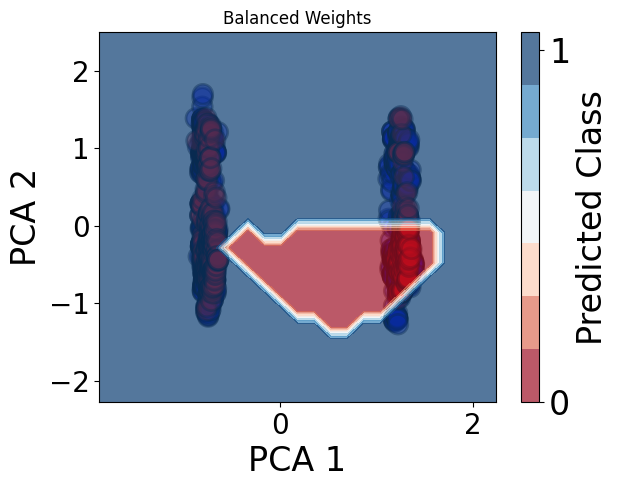

BMR


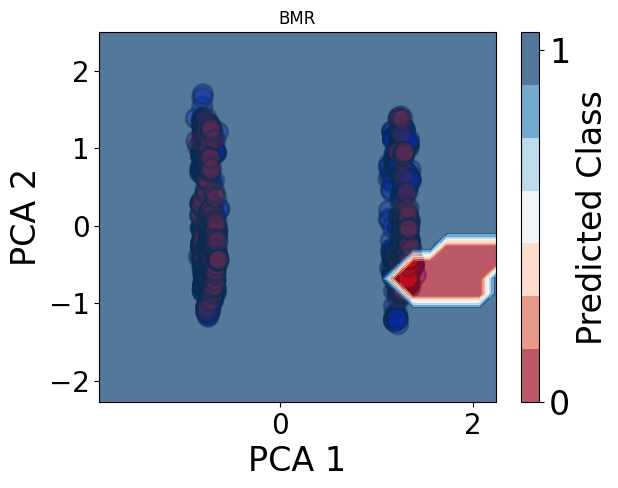

Threshold


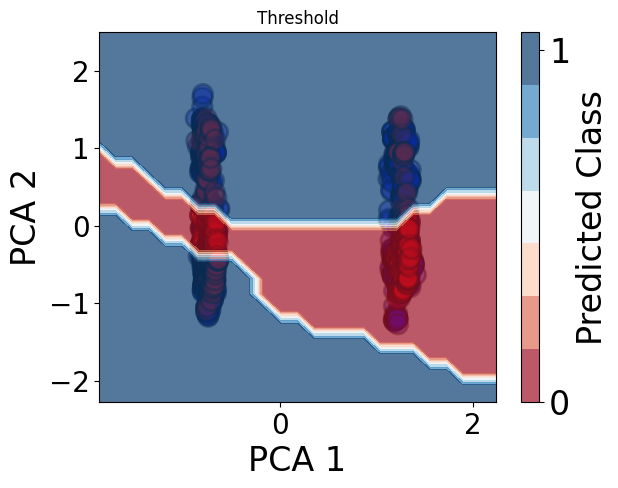

In [28]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)

data_clf['clf'] = classifiers_dict['Baseline']

## Fit deltas

Original Data
plotting training data as data input


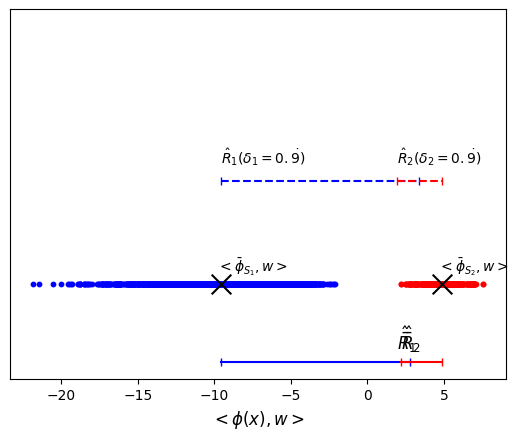

Budget 1041 found 67 viable downsampled solutions
Best solution found by removing 10 data points
Downsampled Data:


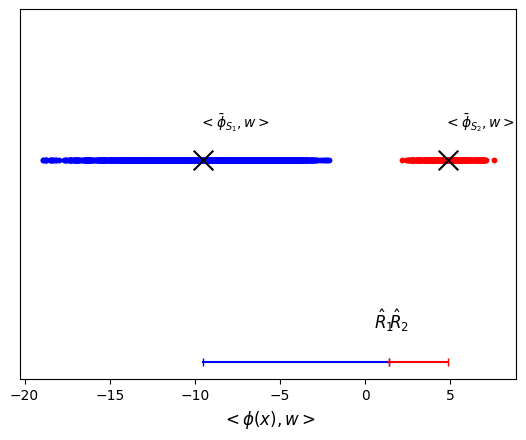

In [29]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=True, 
                                                     _plot=True,
                                                     method='supports-prop-update_mean',
                                                    #  method='supports-prop-update_mean-margin_only',
                                                     max_trials=10000,
                                                     parallel=True)

## Plot training data information

plotting training data as data input


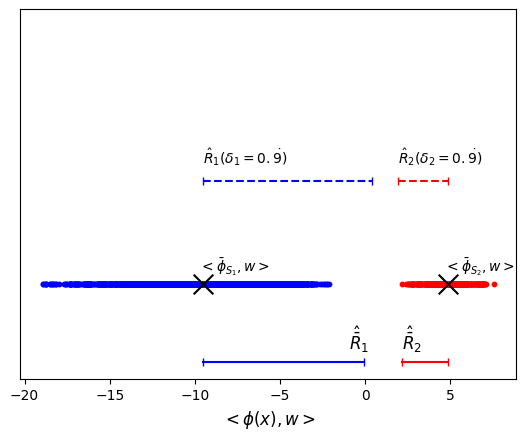

In [30]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [31]:
deltas_model.print_params()

Parameters
                R:  18.91958197071776
                N1: 1642
                N2: 430
                R1: 9.426426275243585
                R2: 2.696851442896479
                M:  2.2418141505022398
                D:  14.365091868642304
                C1: 1
                C2: 1


# Evaluation on test data

                  Accuracy    G-Mean   ROC-AUC        F1
Method                                                  
Baseline          0.987998  0.977749  0.994024  0.970760
SMOTE             0.981277  0.966510  0.989869  0.954279
Balanced Weights  0.984157  0.972725  0.992840  0.961494
BMR               0.974556  0.940439  0.994024  0.935287
Threshold         0.985598  0.982353  0.994024  0.965675
Our Method        0.980797  0.957183  0.994024  0.952038 


Baseline


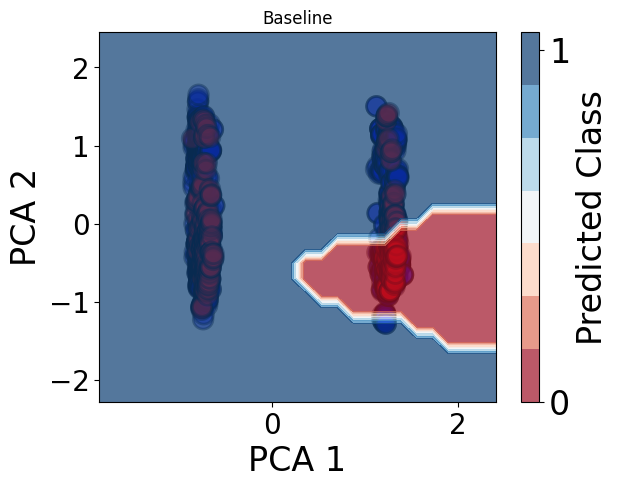

SMOTE


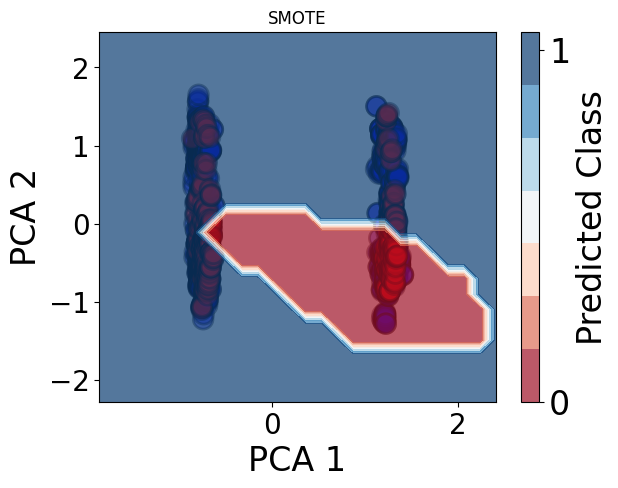

Balanced Weights


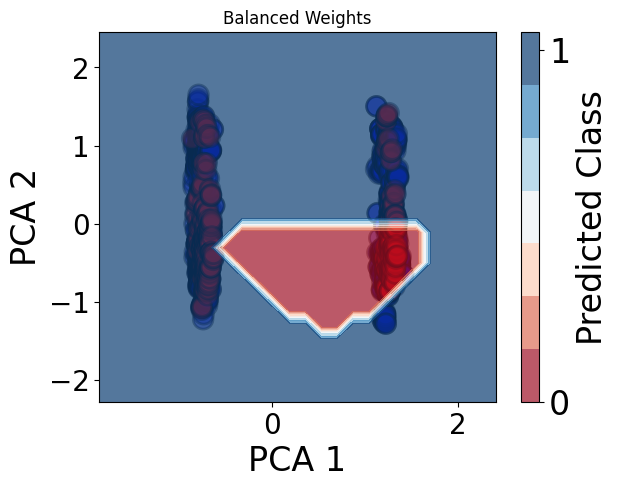

BMR


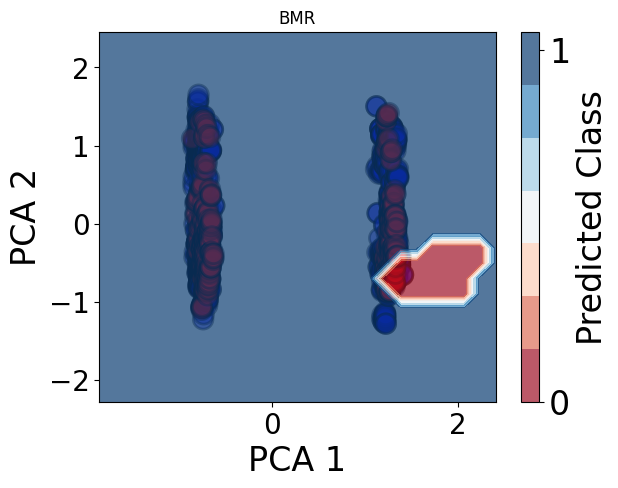

Threshold


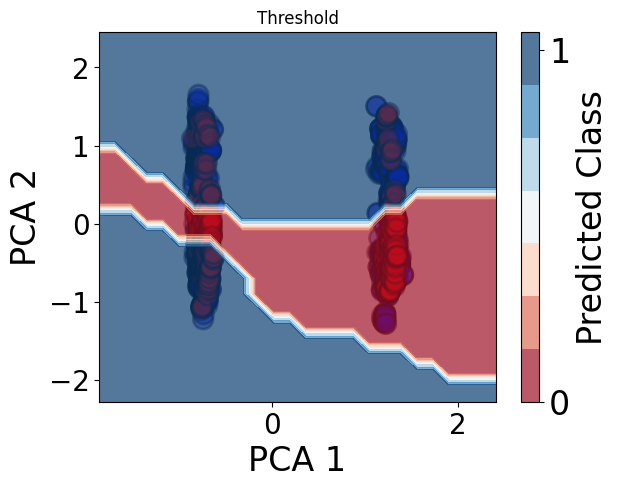

Our Method


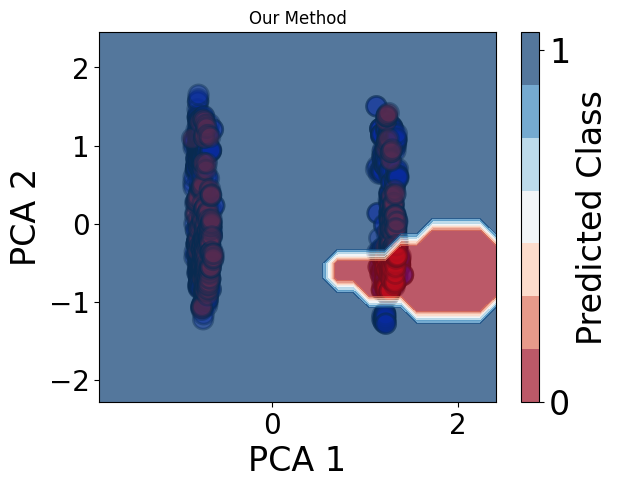

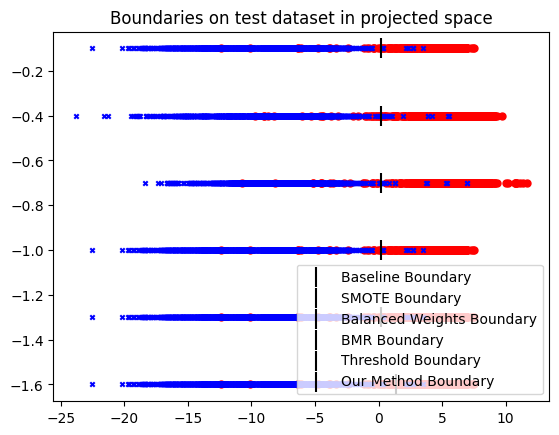

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Baseline & 0.9880 & 0.9777 & 0.9940 & 0.9708 \\
SMOTE & 0.9813 & 0.9665 & 0.9899 & 0.9543 \\
Balanced Weights & 0.9842 & 0.9727 & 0.9928 & 0.9615 \\
BMR & 0.9746 & 0.9404 & 0.9940 & 0.9353 \\
Threshold & 0.9856 & 0.9824 & 0.9940 & 0.9657 \\
Our Method & 0.9808 & 0.9572 & 0.9940 & 0.9520 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Baseline,0.987998,0.977749,0.994024,0.970760
SMOTE,0.981277,0.966510,0.989869,0.954279
Balanced Weights,0.984157,0.972725,0.992840,0.961494
BMR,0.974556,0.940439,0.994024,0.935287
Threshold,0.985598,0.982353,0.994024,0.965675
Our Method,0.980797,0.957183,0.994024,0.952038


In [32]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])